In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv("C:/Users/DSC-GDP075/Documents/SADiabites.csv")
df = df.replace("-", np.nan)
year = ['2000', '2011', '2024']
df[year] = df[year].replace(" -", np.nan).apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df[year] = df[year].apply(pd.to_numeric, errors='coerce')
#df[year] = df[year].apply(pd.to_numeric)
df.head()

,Indicator,2000,2011,2024,2050
0,People with diabetes (1000s),996.7,2759.6,5344.6,9474
1,Age-standardised prevalence of diabetes %,NaN,19.6,23.1,25.4
2,Proportion undiagnosed %,NaN,NaN,43.6,NaN
3,Undiagnosed people (1000s),NaN,NaN,2330.2,NaN
4,People with IFG (1000s),NaN,NaN,3793.1,5319.6


In [3]:
# preparing for the analysis 
df_long = df.melt(id_vars="Indicator", 
                  value_vars= year, 
                  var_name="Year", 
                  value_name="Value")

df_long["Year"] = df_long["Year"].astype(int)
df_long.tail()


,Indicator,Year,Value
43,Health expenditure per person USD,2024,1372.5
44,Type 1 diabetes (all ages),2024,222942.0
45,Type 1 diabetes (0-19y),2024,46468.9
46,Adult population (1000s),2024,24983.1
47,Population age 0-19,2024,10525192.0


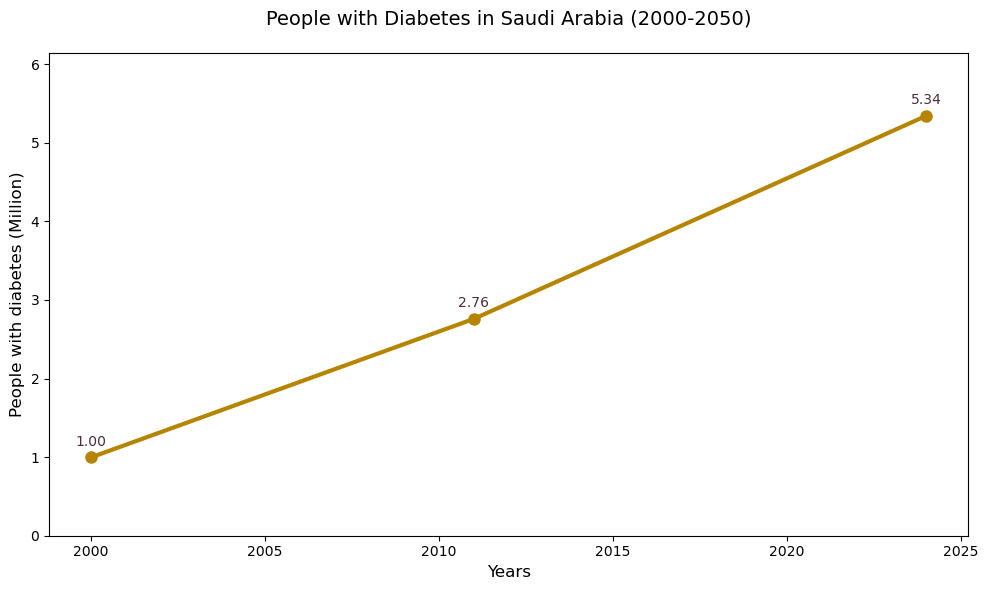

In [4]:
#ppl with diabites in ksa 
plt.figure(figsize=(10, 6))

subset_diab_people = df_long[df_long["Indicator"] == "People with diabetes (1000s)"].copy()

subset_diab_people["Value"] = pd.to_numeric(subset_diab_people["Value"], errors='coerce')
subset_diab_people = subset_diab_people.dropna(subset=["Value"])

# Convert from thousands to millions
subset_diab_people["Value_million"] = subset_diab_people["Value"] / 1000

plt.plot(subset_diab_people["Year"], subset_diab_people["Value_million"], marker="o", color="#B58500", linewidth=3, markersize=8)
plt.title("People with Diabetes in Saudi Arabia (2000-2050)", fontsize=14, pad=20)
plt.xlabel("Years", fontsize=12)
plt.ylabel("People with diabetes (Million)", fontsize=12)

y_max_people = subset_diab_people["Value_million"].max()
plt.ylim(0, y_max_people * 1.15)

for x, y in zip(subset_diab_people["Year"], subset_diab_people["Value_million"]):
    plt.text(x, y + y_max_people*0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=10, color="#4B2C3D")

plt.tight_layout()
plt.show()


In [5]:
diab = df.set_index("Indicator").loc["People with diabetes (1000s)"]
growth = ((diab["2024"] - diab["2000"]) / diab["2000"]) * 100
print("Growth rate from 2000 to 2024:", round(growth, 2), "%")
####### Great Insights Growth from 2000 to 2024: 436.23 %

Growth rate from 2000 to 2024: 436.23 %


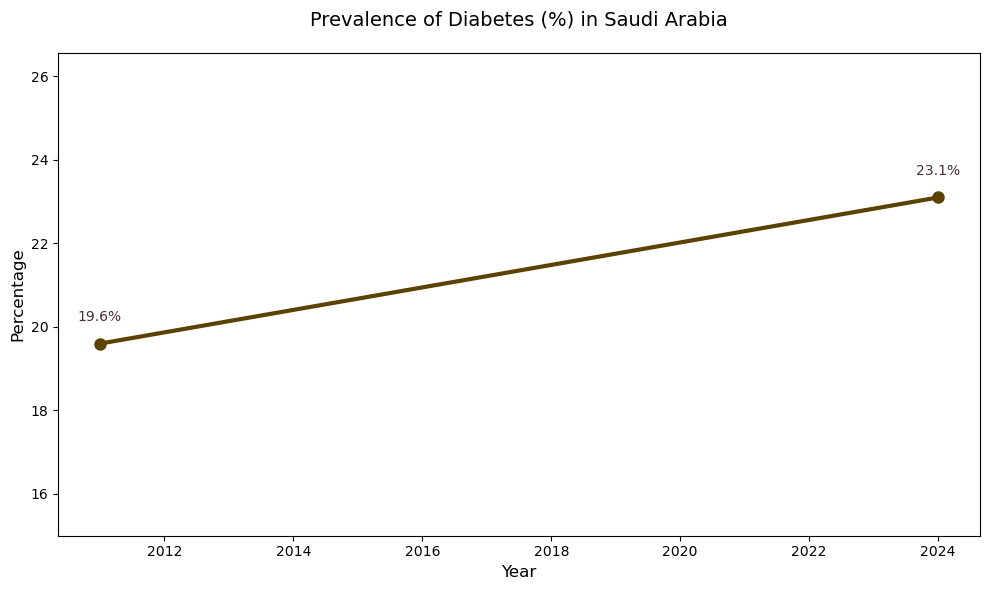

In [6]:

subset = df_long[df_long["Indicator"] == "Age-standardised prevalence of diabetes %"].copy()

# Convert to numeric and drop missing values
subset["Value"] = pd.to_numeric(subset["Value"], errors='coerce')
subset = subset.dropna(subset=["Value"])

plt.figure(figsize=(10, 6))
plt.plot(subset["Year"], subset["Value"], marker="o", color="#5B4200", linewidth=3, markersize=8)

plt.title("Prevalence of Diabetes (%) in Saudi Arabia", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

y_max_prev = subset["Value"].max()
plt.ylim(15, y_max_prev * 1.15)

for x, y in zip(subset["Year"], subset["Value"]):
    plt.text(x, y + y_max_prev*0.02, f"{y:.1f}%", ha='center', va='bottom', fontsize=10, color="#4B2C3D")

plt.tight_layout()
plt.show()


In [7]:
undiag_rate = df.set_index("Indicator").loc["Proportion undiagnosed %", "2024"]
undiag_pop = df.set_index("Indicator").loc["Undiagnosed people (1000s)", "2024"]
print("Percentage of Undiagnosed people in 2024:", undiag_rate, "%")
print("Number of Undiagnosed people in 2024 (Million):", f"{undiag_pop: ,}")

Percentage of Undiagnosed people in 2024: 43.6 %
Number of Undiagnosed people in 2024 (Million):  2,330.2


In [8]:
deaths = df.set_index("Indicator").loc["Diabetes deaths", "2011"]
population = df.set_index("Indicator").loc["Adult population (1000s)", "2011"]

death_rate = deaths / (population)*100
print("Death rate in 2011 because of diabities:", death_rate, "%")

#################################################################

deaths = df.set_index("Indicator").loc["Diabetes deaths", "2024"]
population = df.set_index("Indicator").loc["Adult population (1000s)", "2024"]

death_rate = deaths / (population)*100
print("Death rate in 2024 because of diabities:", death_rate, "%")

Death rate in 2011 because of diabities: 90.45890314394474 %
Death rate in 2024 because of diabities: 32.17495026638007 %


In [9]:

year = ["2011", "2024"]
prev = df.set_index("Indicator").loc["Age-standardised prevalence of diabetes %"][year].astype(float)
exp_usd = df.set_index("Indicator").loc["Health expenditure per person USD"][year]
exp_sar = exp_usd.astype(float) * 3.75

comparison = pd.DataFrame({
    "Year": year,
    "Prevalence (%)": prev.values,
    "Expenditure per person (SAR)": exp_sar.values
})

print(comparison)



   Year  Prevalence (%)  Expenditure per person (SAR)
0  2011            19.6                      3742.500
1  2024            23.1                      5146.875


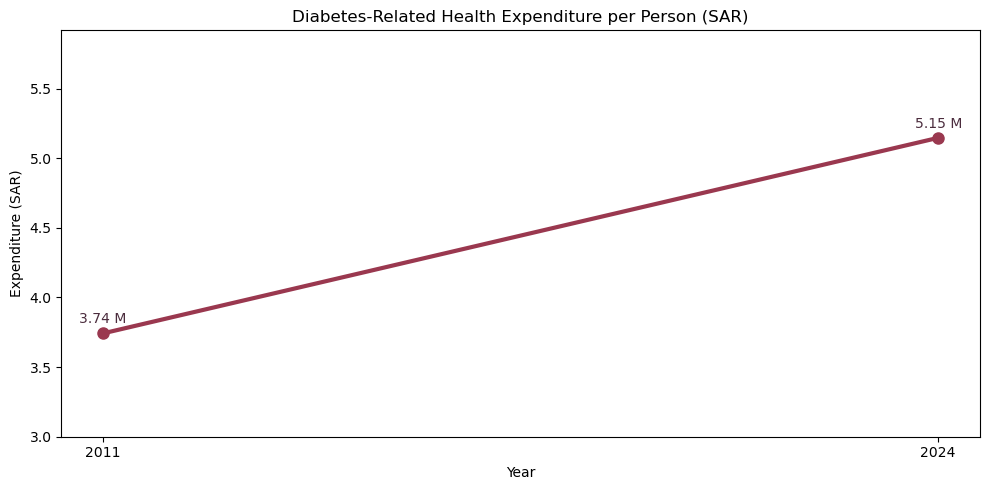

In [37]:
plt.figure(figsize=(10,5))
lines=plt.plot(year, exp_sar.values, marker="o", linewidth=3, color="#9A384F", markersize= 8)
plt.title("Diabetes-Related Health Expenditure per Person (SAR)")
plt.xlabel("Year")
plt.ylabel("Expenditure (SAR)")
#plt.grid(True)

# point labels you already used (convert values for display)
for x, y in zip(year, exp_sar.values):
    plt.text(x, y + y_max*0.01, f"{y/1000:.2f} M", ha='center', va='bottom', fontsize=10, color="#4B2C3D")

# Format y-axis ticks to show "X.X M" (divide by 1000)
ax = plt.gca()

def millions_formatter(x, pos):
    # x is in the original units; divide by 1000 to get "millions" as you requested
    return f"{x/1000:.1f}"

ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))

plt.ylim(3000, y_max * 1.15)
plt.tight_layout()
plt.show()



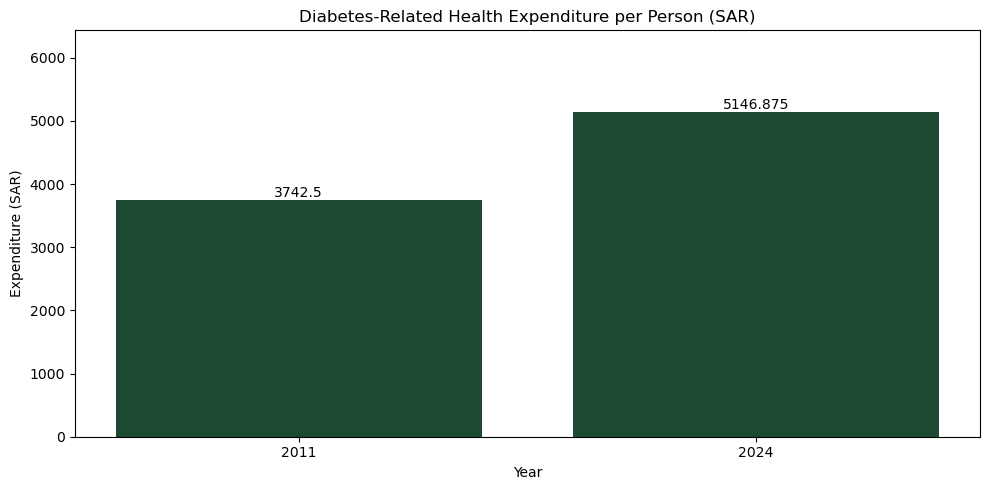

In [11]:
plt.figure(figsize=(10,5))
barr = plt.bar(year, exp_sar.values, color="#1D4831")
plt.title("Diabetes-Related Health Expenditure per Person (SAR)")
plt.xlabel("Year")
plt.ylabel("Expenditure (SAR)")

for i in barr:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2, height + 0.2, str(height), ha='center', va='bottom', fontsize=10, clip_on=False)
    
plt.ylim(0, max(exp_sar) * 1.25) 

plt.tight_layout()
plt.show()

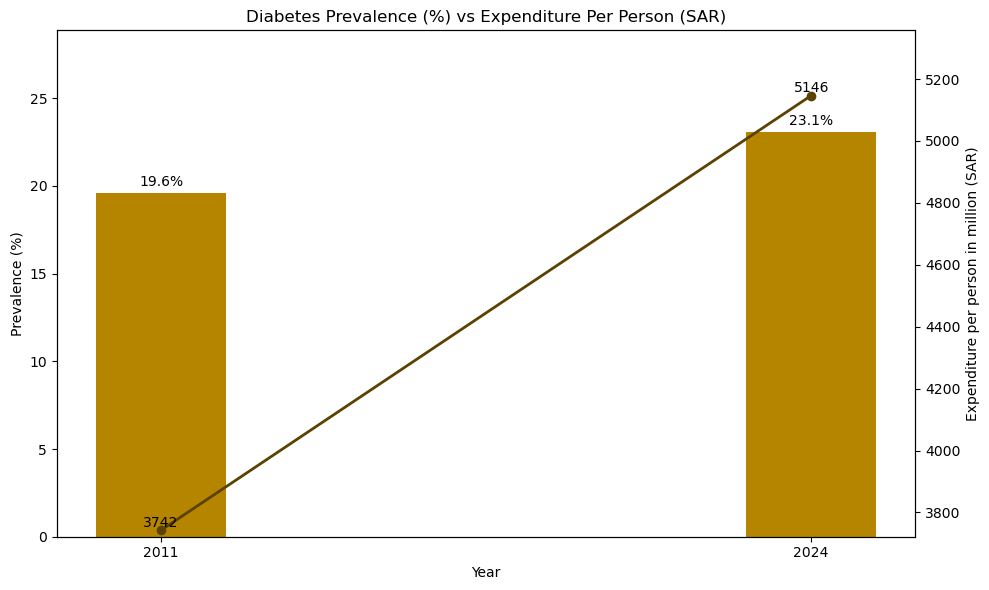

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# BAR - prevalence
bars = ax1.bar(year, prev, label="Diabetes Prevalence (%)", color="#B58500", width=0.2) 
ax1.set_xlabel("Year")
ax1.set_ylabel("Prevalence (%)", color="black")
ax1.tick_params(axis="y", labelcolor="black")

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.2, f"{height:.1f}%", 
             ha='center', va='bottom', fontsize=10, clip_on=False)


ax1.set_ylim(0, max(prev) * 1.25)  

ax2 = ax1.twinx()
ax2.plot(year, exp_sar, marker="o", linewidth=2, label="Expenditure Per Person (SAR)", color="#5B4200")
ax2.set_ylabel("Expenditure per person in million (SAR)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

min_exp, max_exp = min(exp_sar), max(exp_sar)
pad = (max_exp - min_exp) * 0.15 if (max_exp - min_exp) != 0 else max_exp * 0.1
ax2.set_ylim(min_exp - pad*0.1, max_exp + pad)

for x, y in zip(year, exp_sar):
    ax2.text(x, y + pad*0.05, f"{int(y)}", ha='center', fontsize=10, clip_on=False)

fig.subplots_adjust(top=0.92)

plt.title("Diabetes Prevalence (%) vs Expenditure Per Person (SAR)")
plt.tight_layout()  
plt.show()
